In [51]:
import pandas as pd
import numpy as np
from scipy.io import arff

data = arff.loadarff('breast.w.arff')
df = pd.DataFrame(data[0])
df.dropna(inplace=True)
df

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,b'benign'
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,b'benign'
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,b'benign'
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,b'benign'
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,b'benign'
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,b'benign'
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,b'benign'
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,b'malignant'
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,b'malignant'


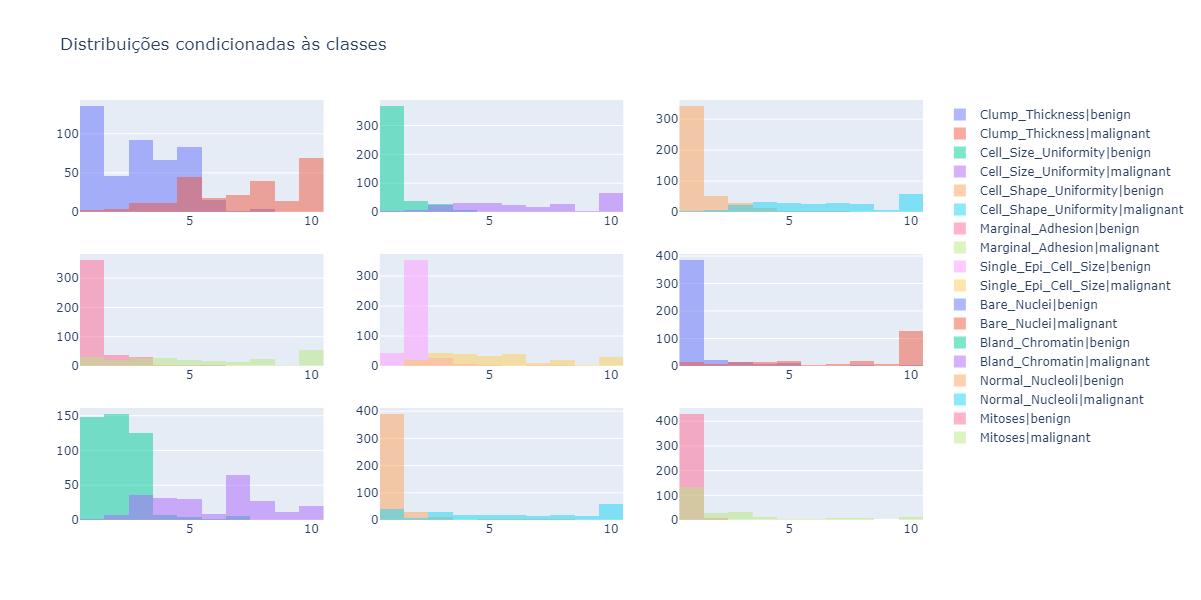

In [52]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)
b = df[df["Class"] == 0]
m = df[df["Class"] == 1]

grid = make_subplots(rows=3, cols=3)
i = 0
for col in ["Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Single_Epi_Cell_Size","Bare_Nuclei","Bland_Chromatin"
,"Normal_Nucleoli","Mitoses"]:
    fig = go.Histogram(x=b[col],nbinsx=10,opacity=0.5,name=col+"|benign")
    grid.append_trace(fig, i//3+1, (i%3)+1)
    fig = go.Histogram(x=m[col],nbinsx=10,opacity=0.5,name=col+"|malignant")
    grid.append_trace(fig, i//3+1, (i%3)+1)
    i += 1

grid.update_layout(height=600, width=800, title_text="Distribuições condicionadas às classes", barmode="overlay", showlegend=True)
grid.show()


In [61]:
from sklearn import model_selection, neighbors
from sklearn.metrics import accuracy_score

data = df.drop(["Class"],axis=1).values
target = df["Class"].values

fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
scores = [[],[],[]]
i = 0
for k in [3,5,7]:
    KNN=neighbors.KNeighborsClassifier(n_neighbors=k,p=2,weights="uniform")
    for train_filter, test_filter in fold.split(data):
        data_train = data[train_filter]
        data_test = data[test_filter]
        target_train = target[train_filter]
        target_test = target[test_filter]
        KNN.fit(data_train,target_train)
        predictions=KNN.predict(data_test)
        scores[i].append([accuracy_score(target_test,predictions)])
    i += 1

for i in range(3):
    print("k=", 2*i+3, np.array(scores)[i].mean())

k= 3 0.9662617220801364
k= 5 0.9735507246376811
k= 7 0.9677323103154306


In [73]:
from sklearn.naive_bayes import GaussianNB
from scipy import stats

fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=9)
score_NB = []
score_KNN = []

KNN=neighbors.KNeighborsClassifier(n_neighbors=3,p=2,weights="uniform")
NB=GaussianNB()

for train_filter, test_filter in fold.split(data):
    data_train = data[train_filter]
    data_test = data[test_filter]
    target_train = target[train_filter]
    target_test = target[test_filter]
    KNN.fit(data_train,target_train)
    predictions_KNN=KNN.predict(data_test)
    NB.fit(data_train,target_train)
    predictions_NB=NB.predict(data_test)
    score_KNN.append(accuracy_score(target_test,predictions_KNN))
    score_NB.append(accuracy_score(target_test,predictions_NB))

print("KNN", np.array(score_KNN).mean(), "NB", np.array(score_NB).mean())

stats.ttest_rel(score_KNN, score_NB, alternative="greater")

KNN 0.9662617220801364 NB 0.9647911338448422


Ttest_relResult(statistic=0.3190325324602352, pvalue=0.37849098250067736)

In [74]:
a = [1,1,0,1,1,1]
b = [0,1,1,1,1,1]
stats.ttest_rel(a, b)

Ttest_relResult(statistic=0.0, pvalue=1.0)

# Lixo

In [18]:
df.replace(b'benign', 0, inplace=True)
df.replace(b'malignant', 1, inplace=True)
b = df[df["Class"] == 0]
m = df[df["Class"] == 1]
for col in ["Clump_Thickness","Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion","Single_Epi_Cell_Size","Bare_Nuclei","Bland_Chromatin"
,"Normal_Nucleoli","Mitoses"]:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=b[col],nbinsx=10))
    fig.add_trace(go.Histogram(x=m[col],nbinsx=10))
    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.75)
    #fig.show()

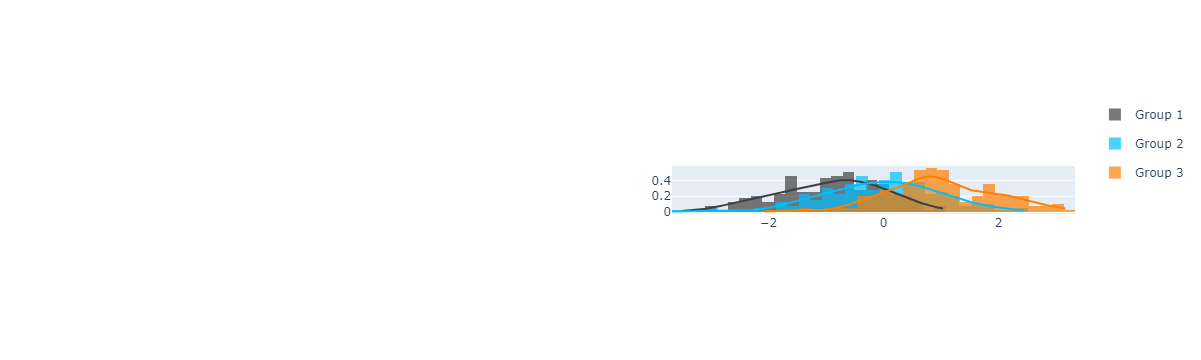

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np

y1 = np.random.randn(200) - 1
y2 = np.random.randn(200)
y3 = np.random.randn(200) + 1
x = np.linspace(0, 1, 200)

colors = ['#3f3f3f', '#00bfff', '#ff7f00']

fig = make_subplots(
    rows=3, cols=2,
    column_widths=[0.55, 0.45],
    row_heights=[1., 1., 1.])

boxfig= go.Figure(data=[go.Box(x=y1, showlegend=False, notched=True, marker_color="#3f3f3f", name='3'),
                        go.Box(x=y2, showlegend=False, notched=True, marker_color="#00bfff", name='2'),
                        go.Box(x=y3, showlegend=False, notched=True, marker_color="#ff7f00", name='1')])


group_labels = ['Group 1', 'Group 2', 'Group 3']
hist_data = [y1, y2, y3]

distplfig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=False)

for k in range(len(distplfig.data)):
    fig.add_trace(distplfig.data[k],
    row=2, col=2
)
fig.update_layout(barmode='overlay')
fig.show()